In [228]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
from matplotlib.lines import Line2D



In [2]:
confidential = open("spotify_eddie_confidential.txt","r")

In [3]:
string = confidential.read()

In [4]:
st = string.split('\n')

In [5]:
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1]

In [6]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))

In [72]:
df = sp.user_playlist_tracks("spotify", "0BUNSGihi2mrhQu3fPcVim")

In [73]:
''' What we need:
 1) Get Playlist [x]
 2) Get artist name from each song of the playlist
 3) Get all albums from each of the artists                       #credit to lord SEVEREIN
 4) Get all songs from each of the albums
 5) Get URI's for all the songs'''


" What we need:\n 1) Get Playlist [x]\n 2) Get artist name from each song of the playlist\n 3) Get all albums from each of the artists                       #credit to lord SEVEREIN\n 4) Get all songs from each of the albums\n 5) Get URI's for all the songs"

In [74]:
df['items'][0]['track']['id']

'1SJ4ycWow4yz6z4oFz8NAG'

In [76]:
for x in df['items']:
    print(x['track']['id'])
    
    

1SJ4ycWow4yz6z4oFz8NAG
25U7raB3ZSszayTYClh4hF
04cdEVbQPb8BJb7593e5fO
5HSkycOEtb9iQ7cg1Oyqmu
2pp3RfqX5cb1BAnmNi4Nej
4wH29TM74O3788Kn1KzWuY
3ZffCQKLFLUvYM59XKLbVm
58KPPL1AdLHMvR2O2PZejr
7Ie9W94M7OjPoZVV216Xus
6aihKTSpfxixl9uqm4hNEy
5PMA1s2sfSlZWTB4XjEGfo
3LRJbFT9rKoKv4aW7PuBJC
2KzIsNi9E7H74h0oVX9JzY
3NdAXnoxuXuIM74oQWVAna
0laYHRpNTS6i8FXdupHkJ4
7a86XRg84qjasly9f6bPSD
2tJulUYLDKOg9XrtVkMgcJ
22PMfvdz35fFKYnJyMn077
0EycxtLQimD0jgscVwTQBz
2QVA6ZKunwNJApyPKvIJ6S
7eQUgarLukHLkZaO1mxtab
0rZQcqysLosoc46Vv6I54b
6agaR8uXdeycsvlxtZvKMW
09whmgWfGHPys6k3M9Athv
0KLGjcaznMqpUwxAws0KwL
3wNXqTMimmuTEj1iEPftC7
0DANcJuMamcL9NyYkEWWTq
1qHaLcG3LOeh6ZB8vii5ZZ
12qAxo8fvGYedhhYQnwJLz
05LnKShwBQgAGaCf37KJbW
7BCDwOzZDNjhICmOP2Dw0O
5syIJeygRTI21cDwFtwsRf
15qrWkkYCfmtu1uRpGf48L
7DdkL7YtSRFZotD4qZloRG
7IqfeRNfc7ZQ878X38kJd9
0PTiNSf92CZq2ffN3Lg9GO
56ThAgAaWjACo2UAhBItSh
4UwtMoKBvYi0mMbH2ZI3uB
0CwYG1UnRmOx8Q1EzElCIL
7j31rVgGX9Q2blT92VBEA0
3bidbhpOYeV4knp8AIu8Xn
6t6oULCRS6hnI7rm0h5gwl
7Gkphzdh5ouurEt7JT49Yu
1CmUZGtH29K

In [78]:
all_id = []
for x in df['items']:
    all_id.append(x['track']['id'])    #all 813 id's

In [79]:
# all audio features
#sp.audio_features(tracks=all_id)              #ignore this, as I have done it in a different way further down

[{'danceability': 0.526,
  'energy': 0.413,
  'key': 9,
  'loudness': -7.674,
  'mode': 1,
  'speechiness': 0.0278,
  'acousticness': 0.428,
  'instrumentalness': 0,
  'liveness': 0.126,
  'valence': 0.211,
  'tempo': 115.936,
  'type': 'audio_features',
  'id': '1SJ4ycWow4yz6z4oFz8NAG',
  'uri': 'spotify:track:1SJ4ycWow4yz6z4oFz8NAG',
  'track_href': 'https://api.spotify.com/v1/tracks/1SJ4ycWow4yz6z4oFz8NAG',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1SJ4ycWow4yz6z4oFz8NAG',
  'duration_ms': 188933,
  'time_signature': 3},
 {'danceability': 0.663,
  'energy': 0.168,
  'key': 0,
  'loudness': -13.725,
  'mode': 1,
  'speechiness': 0.0448,
  'acousticness': 0.928,
  'instrumentalness': 5.68e-05,
  'liveness': 0.361,
  'valence': 0.678,
  'tempo': 85.005,
  'type': 'audio_features',
  'id': '25U7raB3ZSszayTYClh4hF',
  'uri': 'spotify:track:25U7raB3ZSszayTYClh4hF',
  'track_href': 'https://api.spotify.com/v1/tracks/25U7raB3ZSszayTYClh4hF',
  'analysis_url': 'https://api

In [83]:
#all_audio_features = pd.DataFrame(sp.audio_features(tracks=all_id))

In [85]:
a#ll_audio_features.head()

,danceability,energy,key,loudness,mode,...,uri,track_href,analysis_url,duration_ms,time_signature
0,0.526,0.413,9,-7.674,1,...,spotify:track:1SJ4ycWow4yz6z4oFz8NAG,https://api.spotify.com/v1/tracks/1SJ4ycWow4yz...,https://api.spotify.com/v1/audio-analysis/1SJ4...,188933,3
1,0.663,0.168,0,-13.725,1,...,spotify:track:25U7raB3ZSszayTYClh4hF,https://api.spotify.com/v1/tracks/25U7raB3ZSsz...,https://api.spotify.com/v1/audio-analysis/25U7...,308027,4
2,0.422,0.878,5,-4.863,1,...,spotify:track:04cdEVbQPb8BJb7593e5fO,https://api.spotify.com/v1/tracks/04cdEVbQPb8B...,https://api.spotify.com/v1/audio-analysis/04cd...,143360,4
3,0.821,0.676,3,-6.366,0,...,spotify:track:5HSkycOEtb9iQ7cg1Oyqmu,https://api.spotify.com/v1/tracks/5HSkycOEtb9i...,https://api.spotify.com/v1/audio-analysis/5HSk...,212360,4
4,0.388,0.327,5,-12.522,1,...,spotify:track:2pp3RfqX5cb1BAnmNi4Nej,https://api.spotify.com/v1/tracks/2pp3RfqX5cb1...,https://api.spotify.com/v1/audio-analysis/2pp3...,140333,3


In [106]:
#all_audio_features.dtypes

danceability      float64
energy            float64
key                 int64
loudness          float64
mode                int64
                   ...   
uri                object
track_href         object
analysis_url       object
duration_ms         int64
time_signature      int64
Length: 18, dtype: object

In [107]:
#all_audio_features.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [88]:
#sp.categories(limit=3)

{'categories': {'href': 'https://api.spotify.com/v1/browse/categories?offset=0&limit=3',
  'items': [{'href': 'https://api.spotify.com/v1/browse/categories/toplists',
    'icons': [{'height': 275,
      'url': 'https://t.scdn.co/media/derived/toplists_11160599e6a04ac5d6f2757f5511778f_0_0_275_275.jpg',
      'width': 275}],
    'id': 'toplists',
    'name': 'Listas mais ouvidas'},
   {'href': 'https://api.spotify.com/v1/browse/categories/pop',
    'icons': [{'height': 274,
      'url': 'https://t.scdn.co/media/derived/pop-274x274_447148649685019f5e2a03a39e78ba52_0_0_274_274.jpg',
      'width': 274}],
    'id': 'pop',
    'name': 'Pop'},
   {'href': 'https://api.spotify.com/v1/browse/categories/hiphop',
    'icons': [{'height': 274,
      'url': 'https://t.scdn.co/media/original/hip-274_0a661854d61e29eace5fe63f73495e68_274x274.jpg',
      'width': 274}],
    'id': 'hiphop',
    'name': 'Hip-hop'}],
  'limit': 3,
  'next': 'https://api.spotify.com/v1/browse/categories?offset=3&limit=3',


In [12]:
df['total']

813

In [13]:
len(df['items'])

100

In [14]:
df.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [15]:
from random import randint
from time import sleep

def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3))
    return tracks

In [16]:
all_tracks = get_playlist_tracks("0BUNSGihi2mrhQu3fPcVim")
len(all_tracks)

813

In [18]:
all_tracks[1]['track']['artists'][0]['name']   #name, track, artists, 

"Israel Kamakawiwo'ole"

In [28]:
def uris(all_tracks):
    uris = [all_tracks[i]['track']['uri'] for i in range(len(all_tracks))]
    return uris
all_uris = uris(all_tracks)

In [118]:
df_all_uris = pd.DataFrame(all_uris, columns=['uri'])
df_all_uris.shape

(813, 1)

In [119]:
#df_all_uris

In [120]:
def all_artists(all_tracks):
    artist = [all_tracks[i]['track']['artists'][0]['name'] for i in range(len(all_tracks))]
    return artist
all_artists = all_artists(all_tracks)

In [121]:
df_all_artists = pd.DataFrame(all_artists, columns=['artist'])
df_all_artists.shape

(813, 1)

In [122]:
#df_all_artists

In [123]:
# def all_albums(all_tracks):
#     albums = [all_tracks[i]['track']['album'][0]['name'] for i in range(len(all_tracks))]            #broken
#     return albums
# all_albums = all_albums(all_tracks)

In [124]:
# df_albums = pd.DataFrame(all_albums, columns=['album'])                #broken
# df_albums.shape

In [125]:
def all_track_names(all_tracks):
    names = [all_tracks[i]['track']['name'] for i in range(len(all_tracks))]
    return names
all_track_names = all_track_names(all_tracks)

In [126]:
#all_track_names

In [127]:
df_all_track_names = pd.DataFrame(all_tracks, columns=['name'])
df_all_track_names.shape


(813, 1)

In [128]:
#df_all_track_names

In [134]:
features = [sp.audio_features(i) for i in (all_uris)]         #this takes long


In [135]:
def flatten(input_list):
    return [item for sublist in input_list for item in sublist]

In [136]:
features_new = flatten(features)
features_new[0]

{'danceability': 0.526,
 'energy': 0.413,
 'key': 9,
 'loudness': -7.674,
 'mode': 1,
 'speechiness': 0.0278,
 'acousticness': 0.428,
 'instrumentalness': 0,
 'liveness': 0.126,
 'valence': 0.211,
 'tempo': 115.936,
 'type': 'audio_features',
 'id': '1SJ4ycWow4yz6z4oFz8NAG',
 'uri': 'spotify:track:1SJ4ycWow4yz6z4oFz8NAG',
 'track_href': 'https://api.spotify.com/v1/tracks/1SJ4ycWow4yz6z4oFz8NAG',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1SJ4ycWow4yz6z4oFz8NAG',
 'duration_ms': 188933,
 'time_signature': 3}

In [137]:
danceability = [features_new[i]['danceability'] for i in range(len(features_new))]
energy = [features_new[i]['energy'] for i in range(len(features_new))]
key = [features_new[i]['key'] for i in range(len(features_new))]
loudness = [features_new[i]['loudness'] for i in range(len(features_new))]
mode = [features_new[i]['mode'] for i in range(len(features_new))]
speechiness = [features_new[i]['speechiness'] for i in range(len(features_new))]
acousticness = [features_new[i]['acousticness'] for i in range(len(features_new))]
instrumentalness = [features_new[i]['instrumentalness'] for i in range(len(features_new))]
liveness = [features_new[i]['liveness'] for i in range(len(features_new))]
valence = [features_new[i]['valence'] for i in range(len(features_new))]
tempo = [features_new[i]['tempo'] for i in range(len(features_new))]



In [138]:
df_all_features = pd.DataFrame.from_dict({'danceability':danceability, 'energy':energy, 'key':key, 'loudness':loudness, 'mode':mode, 'speechiness':speechiness, 'acousticness':acousticness, 'instrumentalness':instrumentalness, 'liveness':liveness, 'valence':valence, 'tempo':tempo})
df_all_features

,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo
0,0.526,0.413,9,-7.674,1,...,0.42800,0.000000,0.1260,0.211,115.936
1,0.663,0.168,0,-13.725,1,...,0.92800,0.000057,0.3610,0.678,85.005
2,0.422,0.878,5,-4.863,1,...,0.00935,0.332000,0.2010,0.496,84.044
3,0.821,0.676,3,-6.366,0,...,0.18700,0.000100,0.0927,0.559,119.012
4,0.388,0.327,5,-12.522,1,...,0.73200,0.001030,0.1500,0.222,107.894
...,...,...,...,...,...,...,...,...,...,...,...
808,0.796,0.798,1,-6.312,1,...,0.03400,0.000042,0.0952,0.942,116.032
809,0.635,0.516,3,-8.677,1,...,0.12500,0.000000,0.1200,0.127,114.074
810,0.569,0.367,5,-5.178,1,...,0.86200,0.000155,0.3370,0.823,169.768
811,0.732,0.764,10,-6.503,0,...,0.16200,0.346000,0.3220,0.685,132.019


In [139]:
df_complete = pd.concat([df_all_artists, df_all_track_names, df_all_uris, df_all_features], axis=1)

In [140]:
df_complete.shape

(813, 14)

In [141]:
df_complete.columns

Index(['artist', 'name', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo'],
      dtype='object')

In [207]:
df_complete

,artist,uri,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,cluster
0,The Muppets,spotify:track:1SJ4ycWow4yz6z4oFz8NAG,0.526,0.413,9,...,0.000000,0.1260,0.211,115.936,1
1,Israel Kamakawiwo'ole,spotify:track:25U7raB3ZSszayTYClh4hF,0.663,0.168,0,...,0.000057,0.3610,0.678,85.005,1
2,Joey Ramone,spotify:track:04cdEVbQPb8BJb7593e5fO,0.422,0.878,5,...,0.332000,0.2010,0.496,84.044,2
3,Asaf Avidan & the Mojos,spotify:track:5HSkycOEtb9iQ7cg1Oyqmu,0.821,0.676,3,...,0.000100,0.0927,0.559,119.012,0
4,Louis Armstrong,spotify:track:2pp3RfqX5cb1BAnmNi4Nej,0.388,0.327,5,...,0.001030,0.1500,0.222,107.894,1
...,...,...,...,...,...,...,...,...,...,...,...
808,Elton John,spotify:track:6zSpb8dQRaw0M1dK8PBwQz,0.796,0.798,1,...,0.000042,0.0952,0.942,116.032,2
809,MAVV,spotify:track:1A2rlbdSXZWyPXkEm3AXK5,0.635,0.516,3,...,0.000000,0.1200,0.127,114.074,2
810,Garfunkel and Oates,spotify:track:6B89ADIwxCw60PHZN6Kdp4,0.569,0.367,5,...,0.000155,0.3370,0.823,169.768,3
811,Shiny Toy Guns,spotify:track:7nXXIXFSyDDPlfzCW9bdAa,0.732,0.764,10,...,0.346000,0.3220,0.685,132.019,0


In [145]:
#cluster = df_complete.columns[df_complete.dtypes != 'object']
cluster = df_complete.drop(['artist','name','uri'], axis=1)

In [150]:
scaler= StandardScaler().fit(cluster)
X_prep = scaler.transform(cluster)

In [151]:
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=3, random_state=1234)

In [152]:
clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

0    486
1    286
2     41
dtype: int64

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

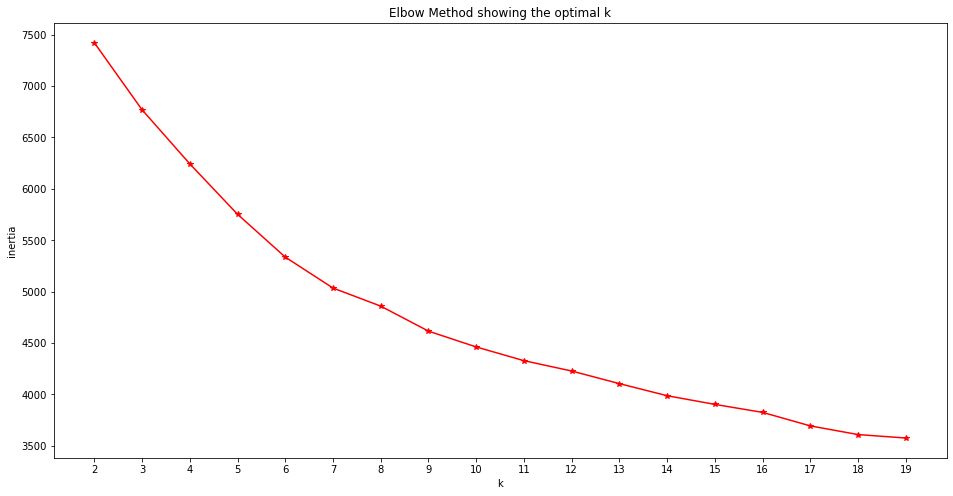

In [154]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'r*-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')    

In [155]:
kmeans = KMeans(n_clusters=5, random_state=1234)
kmeans.fit(X_prep)
clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

0    184
1    184
2    299
3    105
4     41
dtype: int64

In [156]:
clusters.shape

(813,)

In [157]:
kmeans.inertia_ 

5752.77607749044

In [160]:
kmeans = KMeans(n_clusters=4,
                init="random",
                n_init=50,  
                max_iter=10,
                tol=0,
                random_state=1234)
kmeans.fit(X_scaled)
print(kmeans.inertia_)

6203.107006050915


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

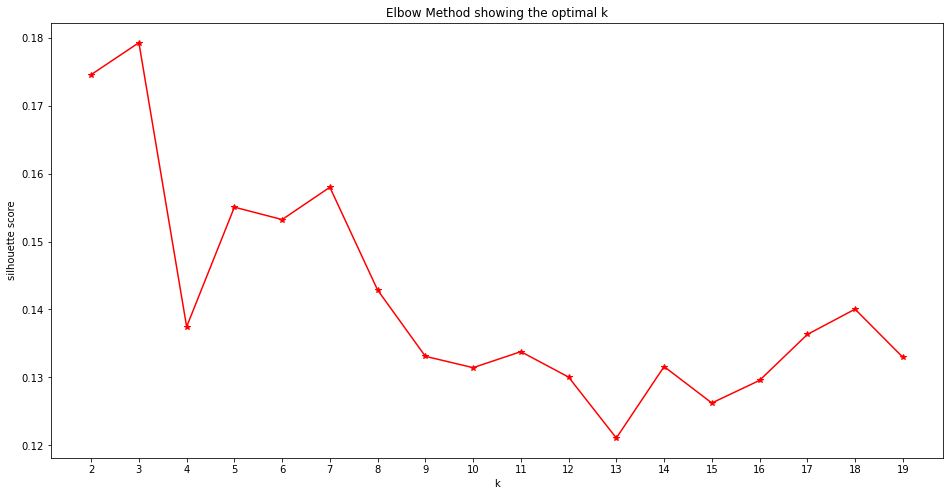

In [161]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))                        #silhouette score is prediction, maximized for 3 clusters, higher score is better


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'r*-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

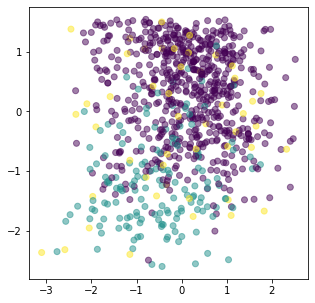

In [174]:
# ward linkage tends to produce relatively equally sized clusters
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='ward')
pred = agglomerative.fit_predict(X_prep)
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=pred,alpha=0.5)
plt.show()

In [175]:
df_complete['cluster'] = clusters

In [200]:
df_complete = df_complete.drop(['name'], axis=1)

In [201]:
df_complete

,artist,uri,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,cluster
0,The Muppets,spotify:track:1SJ4ycWow4yz6z4oFz8NAG,0.526,0.413,9,...,0.000000,0.1260,0.211,115.936,1
1,Israel Kamakawiwo'ole,spotify:track:25U7raB3ZSszayTYClh4hF,0.663,0.168,0,...,0.000057,0.3610,0.678,85.005,1
2,Joey Ramone,spotify:track:04cdEVbQPb8BJb7593e5fO,0.422,0.878,5,...,0.332000,0.2010,0.496,84.044,2
3,Asaf Avidan & the Mojos,spotify:track:5HSkycOEtb9iQ7cg1Oyqmu,0.821,0.676,3,...,0.000100,0.0927,0.559,119.012,0
4,Louis Armstrong,spotify:track:2pp3RfqX5cb1BAnmNi4Nej,0.388,0.327,5,...,0.001030,0.1500,0.222,107.894,1
...,...,...,...,...,...,...,...,...,...,...,...
808,Elton John,spotify:track:6zSpb8dQRaw0M1dK8PBwQz,0.796,0.798,1,...,0.000042,0.0952,0.942,116.032,2
809,MAVV,spotify:track:1A2rlbdSXZWyPXkEm3AXK5,0.635,0.516,3,...,0.000000,0.1200,0.127,114.074,2
810,Garfunkel and Oates,spotify:track:6B89ADIwxCw60PHZN6Kdp4,0.569,0.367,5,...,0.000155,0.3370,0.823,169.768,3
811,Shiny Toy Guns,spotify:track:7nXXIXFSyDDPlfzCW9bdAa,0.732,0.764,10,...,0.346000,0.3220,0.685,132.019,0


In [202]:
topsongs = pd.read_csv('C:\\Users\\eddie\\Desktop\\Ironhack\\week6\\week6 day3\\songs_top_100.csv')

In [203]:
topsongs

,Unnamed: 0,title,artist
0,0,All Too Well (Taylor's Version),Taylor Swift
1,1,Easy On Me,Adele
2,2,Stay,The Kid LAROI & Justin Bieber
3,3,Industry Baby,Lil Nas X & Jack Harlow
4,4,Smokin Out The Window,Silk Sonic (Bruno Mars & Anderson .Paak)
...,...,...,...
95,95,Moth To A Flame,Swedish House Mafia & The Weeknd
96,96,'Til You Can't,Cody Johnson
97,97,Woman,Doja Cat
98,98,Take My Breath,The Weeknd


In [204]:
def features_api(track, artist):
    track_id = sp.search(q='artist:' + artist + ' track:' + track, type='track')
    uri = track_id["tracks"]["items"][0]['id']
    features_api = sp.audio_features(uri)
    return features_api

In [216]:
def eddie_is_cool():
    from random import randint
    song_choice=input("pick song now: ")
    if len(song_choice)==0:
        print("just....why?")
    else: 
        song_choice_l=song_choice.lower() 
        filter_song=topsongs[(topsongs["title"].str.lower()).str.contains(song_choice_l)]

        if len(filter_song) == 0:
            print("NO")
            random_song2 = randint(0, len(topsongs)-1)
            print("check this out '" + topsongs["title"][random_song2] + "' by " + topsongs["artist"][random_song2])

        else:
            print("THIS SONG IS LIT")
            random_song = randint(0, len(topsongs)-1)
            print("you might also enjoy '" + topsongs["title"][random_song] + "' by " + topsongs["artist"][random_song])





In [ ]:
eddie_is_cool()


In [ ]:
#////////////////???????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????

In [218]:
def features_api(track, artist):
    track_id = sp.search(q='artist:' + artist + ' track:' + track, type='track')
    uri = track_id["tracks"]["items"][0]['id']
    features_api = sp.audio_features(uri)
    return features_api

In [226]:
def what_am_i_doing_with_my_life():
    new_song = input("song now: ").lower()
    new_artist = input("artist now: ").lower()
        
    if new_song in np.array(topsongs['title']):
        return random.choice(np.array(topsongs['title']))
    else:
        print('error')
        
    print('Your recommendation is:',random.choice(list(df_complete['artist'])))
  

In [227]:
what_am_i_doing_with_my_life()

Enter a song:  for tonight
Enter an artist:  giveon


error
Your recommendation is: Brave Saint Saturn
